<a href="https://colab.research.google.com/github/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/blob/main/Driver_Behavior_Detection_with_Smartphone_Signal_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Driver Behavior Detection with Smartphone Signal Processing

## Project Architecture

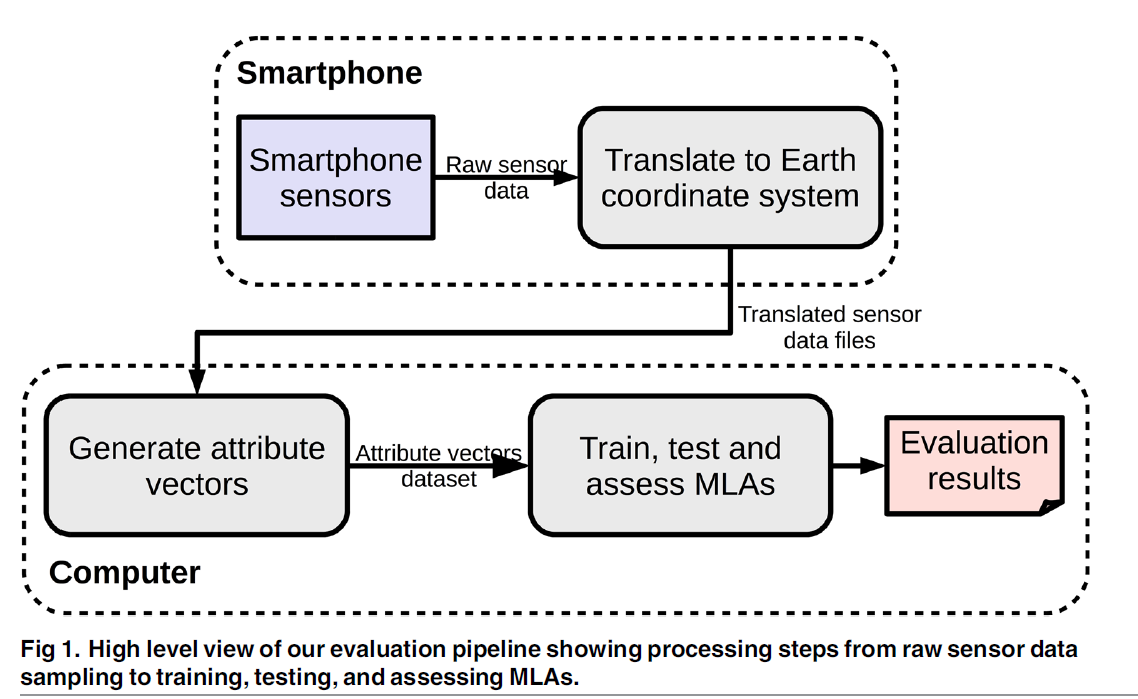

# Loading Data

Source:
- https://data.mendeley.com/datasets/5stn873wft/1
- S. Nazirkar, “Phone sensor data while driving a car and normal or aggressive driving behaviour classification”. Mendeley, 2021. doi: 10.17632/5STN873WFT.1.

Data has been recorded on an android phone attached to the dashboard of the car. Data was collected while driving the car on city roads in mild traffic.
The parameters recorded are:
- Longitude
- Latitude
- Speed
- Distance
- Time
- Accelerometer X
- Accelerometer Y
- Accelerometer Z
- Heading
- Gyroscope X
- Gyroscope Y
- Gyroscope Z

Sampling Rate: Average 2 samples (rows) per second

Driver Behaviors:
    1. Normal driving (Class Label: 0)
    2. Aggressive driving (Class Label: 1)

In [ ]:
# general libraries
import pandas as pd
import seaborn as sns
sns.set_theme(style="darkgrid", rc={ 'figure.figsize': (11, 8)})
import numpy as np
import random
from sklearn.utils import check_random_state  # Used to manage a random_state object
# Set a seed value
seed_value = 42
np.random.seed(42) # Set `numpy` seed
random.seed(42) # Set `random` seed
random_state = check_random_state(42) # Set `sklearn` seed via the random_state parameter in sklearn functions/models


In [ ]:
path1 = 'https://raw.githubusercontent.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/main/data/nazirkar_2021_dataset/1_20210317_184512.csv'
path2= 'https://raw.githubusercontent.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/main/data/nazirkar_2021_dataset/2_20210317_171452.csv'
path3= 'https://raw.githubusercontent.com/AvivGelfand/Driver-Behavior-Detection-Using-Smartphone-Signals/main/data/nazirkar_2021_dataset/3_FinalDatasetCsv.csv'
df1=pd.read_csv(path1)
df1['data_set'] = 1
# df1.info()
df2=pd.read_csv(path2)
# df2.info()
df2['data_set'] = 2
df3=pd.read_csv(path3)
# df3.info()
df3['data_set'] = 3

df_combined = pd.concat([df2,df1])
df_combined.info()
df_combined.head()


<class 'pandas.core.frame.DataFrame'>
Index: 14249 entries, 0 to 6645
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Longitude  14249 non-null  float64
 1   Latitude   14249 non-null  float64
 2   Speed      14249 non-null  float64
 3   Distance   14249 non-null  float64
 4   Time       14249 non-null  object 
 5   Acc X      14249 non-null  float64
 6   Acc Y      14249 non-null  float64
 7   Acc Z      14249 non-null  float64
 8   Heading    14249 non-null  float64
 9   gyro_x     14249 non-null  float64
 10  gyro_y     14249 non-null  float64
 11  gyro_z     14249 non-null  float64
 12  data_set   14249 non-null  int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 1.5+ MB


,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,data_set
0,73.831324,18.518700,1.29,8.312031e+06,17-14-53,0.046402,-0.137178,-0.282934,265.0,-0.036306,-0.008226,-0.023416,2
1,73.831324,18.518700,1.29,8.312031e+06,17-14-53,-0.136978,0.365242,0.108889,266.0,0.035776,-0.009448,0.009570,2
2,73.831324,18.518700,1.29,8.312031e+06,17-14-53,-0.045355,-0.103340,-0.534985,266.0,-0.011871,-0.027774,0.003462,2
3,73.831201,18.518714,0.31,1.302423e+01,17-14-53,0.242089,0.072761,-0.350396,266.0,-0.017980,0.002769,-0.005091,2
4,73.831201,18.518714,0.31,1.302423e+01,17-14-53,-0.230234,0.011765,-0.494085,266.0,0.011342,0.003380,0.006516,2


In [ ]:
# prompt: merge left df_combined and df3 on  matching 'Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y' ,'gyro_z'
merged_df = pd.merge(left=df_combined, right=df3, on=['Acc X', 'Acc Y', 'Acc Z', 'gyro_x', 'gyro_y', 'gyro_z'], how='left',
                     suffixes=('_origin', '_new'))
# prompt: using merged_df compare stats between label values 0, 1, and null
merged_df.fillna(2, inplace=True)

# change label to int type
merged_df['label'] = merged_df['label'].astype(int)
merged_df['Time'] = pd.to_datetime(merged_df['Time'], format='%H-%M-%S', errors='coerce')
# merged_df.to_csv('Nazirkar_full.csv',index=False)

merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14253 entries, 0 to 14252
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Longitude        14253 non-null  float64       
 1   Latitude         14253 non-null  float64       
 2   Speed            14253 non-null  float64       
 3   Distance         14253 non-null  float64       
 4   Time             14253 non-null  datetime64[ns]
 5   Acc X            14253 non-null  float64       
 6   Acc Y            14253 non-null  float64       
 7   Acc Z            14253 non-null  float64       
 8   Heading          14253 non-null  float64       
 9   gyro_x           14253 non-null  float64       
 10  gyro_y           14253 non-null  float64       
 11  gyro_z           14253 non-null  float64       
 12  data_set_origin  14253 non-null  int64         
 13  label            14253 non-null  int64         
 14  data_set_new     14253 non-null  float

,Longitude,Latitude,Speed,Distance,Time,Acc X,Acc Y,Acc Z,Heading,gyro_x,gyro_y,gyro_z,data_set_origin,label,data_set_new
0,73.831324,18.518700,1.29,8.312031e+06,1900-01-01 17:14:53,0.046402,-0.137178,-0.282934,265.0,-0.036306,-0.008226,-0.023416,2,0,3.0
1,73.831324,18.518700,1.29,8.312031e+06,1900-01-01 17:14:53,-0.136978,0.365242,0.108889,266.0,0.035776,-0.009448,0.009570,2,0,3.0
2,73.831324,18.518700,1.29,8.312031e+06,1900-01-01 17:14:53,-0.045355,-0.103340,-0.534985,266.0,-0.011871,-0.027774,0.003462,2,2,2.0
3,73.831201,18.518714,0.31,1.302423e+01,1900-01-01 17:14:53,0.242089,0.072761,-0.350396,266.0,-0.017980,0.002769,-0.005091,2,2,2.0
4,73.831201,18.518714,0.31,1.302423e+01,1900-01-01 17:14:53,-0.230234,0.011765,-0.494085,266.0,0.011342,0.003380,0.006516,2,0,3.0


# EDA

In [ ]:
# # prompt: Using dataframe merged_df: plot each colunn against the index

# for column in merged_df.columns:
#     merged_df.plot(y=column);


In [ ]:
# # Group the DataFrame by the 'label' column
# grouped_df = merged_df[[ 'Time', 'Acc X', 'Acc Y','Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z', 'label']].groupby('label')

# # Calculate descriptive statistics for each group
# descriptive_stats = grouped_df.describe()

# # Print the descriptive statistics
# display(descriptive_stats.T)

In [ ]:
# # prompt: use merged_df to make violin plots by label
# import matplotlib.pyplot as plt
# import seaborn as sns
# # Create a violin plot for each numerical column, grouped by label
# for col in ['Acc X', 'Acc Y', 'Acc Z', 'Heading', 'gyro_x', 'gyro_y', 'gyro_z']:
#     sns.violinplot(x='label', y=col, data=merged_df, inner='quartile')
#     plt.title(f'Violin Plot of {col} by Label')
#     plt.xlabel('Label')
#     plt.ylabel(col)
#     plt.show();

In [ ]:
# # prompt: Using dataframe df: Using dataframe df: line plot of accx,accy,accz vs index with matplotlib, fig size (12,14), line width small
# import matplotlib.pyplot as plt
# plt.figure(figsize=(12,14))
# # plt.plot(df.index, df1['accx'], linewidth=0.5, label='accx')
# # plt.plot(df.index, df['accy'], linewidth=0.5, label='accy')
# # plt.plot(df.index, df['accz'], linewidth=0.5, label='accz')
# plt.xlabel('Index')
# plt.ylabel('Acceleration')
# plt.title('Line Plot of accx, accy, accz vs Index')

In [ ]:
# # prompt: Using dataframe df: violin plot plot accx,accy,accz vs class seaborn
# import seaborn as sns
# sns.violinplot(x="class", y="accx", data=df);

In [ ]:
# sns.violinplot(x="class", y="accy", data=df);

In [ ]:
# sns.violinplot(x="class", y="accz", data=df);

# Feature Extraction

In [ ]:
tmp =  merged_df[[ 'Time', 'Acc X', 'Acc Y','Acc Z', 'gyro_x', 'gyro_y', 'gyro_z', 'label']].copy()
tmp = tmp[tmp['label'] !=2]
from sklearn.model_selection import train_test_split

# Determine the split index
split_idx = int(len(tmp) * 0.6)  # 80% for training, 20% for testing

# Split the data into training and testing sets without shuffling
raw_train = tmp.iloc[:split_idx]
raw_test = tmp.iloc[split_idx:]


tmp['Time'] = pd.to_datetime(tmp['Time'], format='%H-%M-%S', errors='coerce')

tmp.to_csv('DrivingBehavior.csv',index=False)
tmp.info()
tmp.head(2)

<class 'pandas.core.frame.DataFrame'>
Index: 10169 entries, 0 to 14247
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Time    10169 non-null  datetime64[ns]
 1   Acc X   10169 non-null  float64       
 2   Acc Y   10169 non-null  float64       
 3   Acc Z   10169 non-null  float64       
 4   gyro_x  10169 non-null  float64       
 5   gyro_y  10169 non-null  float64       
 6   gyro_z  10169 non-null  float64       
 7   label   10169 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 715.0 KB


,Time,Acc X,Acc Y,Acc Z,gyro_x,gyro_y,gyro_z,label
0,1900-01-01 17:14:53,0.046402,-0.137178,-0.282934,-0.036306,-0.008226,-0.023416,0
1,1900-01-01 17:14:53,-0.136978,0.365242,0.108889,0.035776,-0.009448,0.009570,0
4,1900-01-01 17:14:53,-0.230234,0.011765,-0.494085,0.011342,0.003380,0.006516,0
12,1900-01-01 17:14:54,-0.199196,0.018982,-0.483660,0.025392,0.019873,-0.014864,0
13,1900-01-01 17:14:54,0.275682,0.278884,-0.136194,-0.006373,-0.014335,-0.008756,0


## Sliding Window for extracting features

In [ ]:
import numpy as np
import pandas as pd

def compute_rolling_mode(labels, window_size):
    # Convert labels to a DataFrame for vectorized operations
    label_df = pd.DataFrame(labels)

    # Use cumulative sum for 0s and 1s to prepare for differential counting
    cumsum = label_df.cumsum()

    # The shifted cumulative sum gives us the start of the window counts
    shifted_cumsum = cumsum.shift(window_size)

    # The counts within the window are the differences
    window_counts = cumsum - shifted_cumsum.fillna(0)  # Fill NA for the first window

    # Determine the mode (most frequent value) across the window
    # 1 if the count of 1s is greater than half the window size, 0 otherwise
    mode_series = (window_counts >= window_size / 2).astype(int)['label']
    return mode_series

def sliding_window_features_optimized(data, min_t=2, max_t=15, step=1):
    sample_rate = 2  # samples per second
    features = []
    numeric_columns = data.select_dtypes(include=[np.number])

    for t in range(min_t, max_t + 1):
        window_size = t * sample_rate
        rolling_windows = numeric_columns.rolling(window=window_size, min_periods=window_size)

        # Compute statistics for each window size
        max_values = rolling_windows.max()
        min_values = rolling_windows.min()
        std_values = rolling_windows.std()
        mean_values = rolling_windows.mean()

        # Calculate mean for first and second halves
        half_window = window_size // 2
        mu_acc_x_1 = numeric_columns['Acc X'].rolling(window=half_window, min_periods=half_window).mean()
        mu_acc_x_2 = numeric_columns['Acc X'].shift(-half_window).rolling(window=half_window, min_periods=half_window).mean()

        # Compute the mode of labels more efficiently
        label_mode = compute_rolling_mode(data['label'], window_size)

        for start in range(window_size - 1, len(data) - window_size + 1, step):
            feature_vector = {
                'time_duration': t,
                'range_acc_x': max_values['Acc X'].iloc[start] - min_values['Acc X'].iloc[start],
                'range_acc_y': max_values['Acc Y'].iloc[start] - min_values['Acc Y'].iloc[start],
                'sigma_acc_x': std_values['Acc X'].iloc[start],
                'sigma_acc_y': std_values['Acc Y'].iloc[start],
                'sigma_ori_x': std_values['gyro_x'].iloc[start],
                'sigma_ori_y': std_values['gyro_y'].iloc[start],
                'mu_acc_x': mean_values['Acc X'].iloc[start],
                'mu_acc_y': mean_values['Acc Y'].iloc[start],
                'mu_ori_x': mean_values['gyro_x'].iloc[start],
                'mu_ori_y': mean_values['gyro_y'].iloc[start],
                'mu_acc_x_1': mu_acc_x_1.iloc[start] if start < len(mu_acc_x_1) else None,
                'mu_acc_x_2': mu_acc_x_2.iloc[start] if start < len(mu_acc_x_2) else None,
                'maxori_x': max_values['gyro_x'].iloc[start],
                'maxori_y': max_values['gyro_y'].iloc[start],
                'minacc_y': min_values['Acc Y'].iloc[start],
                'label': label_mode.iloc[start] if start < len(label_mode) else None,
            }
            features.append(feature_vector)

    return pd.DataFrame(features)

# Example of how to use the function
# df_processed = sliding_window_features_optimized(tmp)
# df_processed

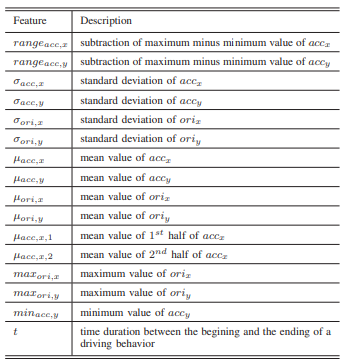

# Run Preprocessing

In [ ]:
# Then, perform feature extraction on each set separately
train_processed = sliding_window_features_optimized(raw_train, min_t=2, max_t=7, step=1)
test_processed = sliding_window_features_optimized(raw_test, min_t=2, max_t=7, step=1)
from sklearn.preprocessing import StandardScaler

print(f"train_processed.shape(): {train_processed.shape}")
display(train_processed.head(2))
display(train_processed.info())

print(f"test_processed.shape(): {test_processed.shape}")

# Extract features and labels
X_train = train_processed.drop('label', axis=1)
y_train = train_processed['label']
X_test = test_processed.drop('label', axis=1)
y_test = test_processed['label']

print(y_train.value_counts())
print(y_test.value_counts())
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


train_processed.shape(): (36510, 17)


,time_duration,range_acc_x,range_acc_y,sigma_acc_x,sigma_acc_y,sigma_ori_x,sigma_ori_y,mu_acc_x,mu_acc_y,mu_ori_x,mu_ori_y,mu_acc_x_1,mu_acc_x_2,maxori_x,maxori_y,minacc_y,label
0,2,0.276636,0.502420,0.123830,0.212895,0.031852,0.013608,-0.130002,0.064703,0.009051,0.001395,-0.214715,-0.024204,0.035776,0.019873,-0.137178,0
1,2,0.505916,0.353477,0.235457,0.180567,0.018261,0.015287,-0.072682,0.168718,0.016534,-0.000132,0.038243,-0.080926,0.035776,0.019873,0.011765,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36510 entries, 0 to 36509
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   time_duration  36510 non-null  int64  
 1   range_acc_x    36510 non-null  float64
 2   range_acc_y    36510 non-null  float64
 3   sigma_acc_x    36510 non-null  float64
 4   sigma_acc_y    36510 non-null  float64
 5   sigma_ori_x    36510 non-null  float64
 6   sigma_ori_y    36510 non-null  float64
 7   mu_acc_x       36510 non-null  float64
 8   mu_acc_y       36510 non-null  float64
 9   mu_ori_x       36510 non-null  float64
 10  mu_ori_y       36510 non-null  float64
 11  mu_acc_x_1     36510 non-null  float64
 12  mu_acc_x_2     36510 non-null  float64
 13  maxori_x       36510 non-null  float64
 14  maxori_y       36510 non-null  float64
 15  minacc_y       36510 non-null  float64
 16  label          36510 non-null  int64  
dtypes: float64(15), int64(2)
memory usage: 4.7 MB


None

test_processed.shape(): (24312, 17)
label
1    22359
0    14151
Name: count, dtype: int64
label
1    18732
0     5580
Name: count, dtype: int64


In [ ]:
# prompt: calculate class weight dict for svm
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Label encode the target variable
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
# Calculate class weights
class_weights = dict(zip(np.unique(y_train_encoded),
                         np.bincount(y_train_encoded) / len(y_train_encoded)))
print(class_weights)

{0: 0.3875924404272802, 1: 0.6124075595727198}


# Itterating all kinds of models

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
import joblib
import time
import os

# Define the models you want to test
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'MUlti-Layer Preceptron' : MLPClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Bagging Classifier': BaggingClassifier(),
    'RBF Kernel SVM': SVC(kernel='rbf',probability=True),
    'RBF Kernel SVM Class Wheight Balanced': SVC(kernel='rbf',probability=True,class_weight=class_weights),
    # 'Sigmoid Kernel SVM': SVC(kernel='sigmoid',probability=True,),
    # 'Sigmoid Kernel SVM Wheight Balanced': SVC(kernel='sigmoid',probability=True,class_weight=class_weights),
    'Polynomial Kernel SVM': SVC(kernel='poly',probability=True,),
    'Polynomial Kernel SVM Wheight Balanced': SVC(kernel='poly',probability=True,class_weight=class_weights),
    'Linear SVM': LinearSVC(),
    'Linear SVM Wheight Balanced': LinearSVC(class_weight=class_weights),
}


In [ ]:
# Dictionary to hold evaluation results
results = []
roc_data = []
# Define the directory path where the model will be saved
directory = f'/content/drive/MyDrive/Models/{time.time()}'
# Create the directory if it does not exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Evaluate each model
for name, model in models.items():
    print("Training ",name)
    start_time = time.time()  # Start timing
    model.fit(X_train, y_train)  # Train the model
    end_time = time.time()  # End timing
    training_time = round(end_time - start_time,3)  # Calculate training time
    print(f"Training took {training_time:.2f} seconds")

    # Save the model to the newly created directory
    model_path = os.path.join(directory, f'{model}.pkl')
    # Save the model to a file
    joblib.dump(model, model_path)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None # hasattr is something new I learned in this project!

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_prob[:, 1]) if y_prob is not None else None
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    tp, fn, fp, tn = confusion_matrix(y_test, y_pred).ravel()

    # Store results
    results.append({
        'Model Name': name,'Accuracy': acc,'Auc-Roc': auc_score,'F1': f1,
        'Precision': precision,'Recall': recall,'TP': tp,'FP': fp,'TN': tn,'FN': fn,
        'train_time_secs': training_time})

    # Store data for summary ROC plot
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob[:, 1])
        roc_auc = auc(fpr, tpr)
        roc_data.append((fpr, tpr, roc_auc, name))

# Create DataFrame from results
results_df = pd.DataFrame(results).sort_values(by='F1', ascending=False)

# Display the DataFrame
display(results_df)


Training  Logistic Regression
Training took 0.21 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213


Training  Decision Tree
Training took 0.80 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  Random Forest
Training took 12.83 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  MUlti-Layer Preceptron
Training took 29.48 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  K-Neighbors
Training took 0.01 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  Gradient Boosting Classifier
Training took 17.80 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  Bagging Classifier
Training took 5.08 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
6,Bagging Classifier,0.864594,0.969848,0.872665,0.904245,0.864594,5323,3035,15697,257,5.078
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  RBF Kernel SVM
Training took 154.79 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
7,RBF Kernel SVM,0.941099,0.984092,0.942766,0.948591,0.941099,5383,1235,17497,197,154.788
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
6,Bagging Classifier,0.864594,0.969848,0.872665,0.904245,0.864594,5323,3035,15697,257,5.078
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  RBF Kernel SVM Class Wheight Balanced
Training took 160.90 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
8,RBF Kernel SVM Class Wheight Balanced,0.954056,0.983763,0.954739,0.956489,0.954056,5275,812,17920,305,160.903
7,RBF Kernel SVM,0.941099,0.984092,0.942766,0.948591,0.941099,5383,1235,17497,197,154.788
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
6,Bagging Classifier,0.864594,0.969848,0.872665,0.904245,0.864594,5323,3035,15697,257,5.078
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  Polynomial Kernel SVM
Training took 132.67 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
8,RBF Kernel SVM Class Wheight Balanced,0.954056,0.983763,0.954739,0.956489,0.954056,5275,812,17920,305,160.903
7,RBF Kernel SVM,0.941099,0.984092,0.942766,0.948591,0.941099,5383,1235,17497,197,154.788
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
9,Polynomial Kernel SVM,0.892769,0.974605,0.898489,0.922027,0.892769,5446,2473,16259,134,132.674
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
6,Bagging Classifier,0.864594,0.969848,0.872665,0.904245,0.864594,5323,3035,15697,257,5.078
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007
1,Decision Tree,0.827369,0.862996,0.838915,0.882955,0.827369,5183,3800,14932,397,0.802


Training  Polynomial Kernel SVM Wheight Balanced
Training took 133.36 seconds


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
8,RBF Kernel SVM Class Wheight Balanced,0.954056,0.983763,0.954739,0.956489,0.954056,5275,812,17920,305,160.903
7,RBF Kernel SVM,0.941099,0.984092,0.942766,0.948591,0.941099,5383,1235,17497,197,154.788
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
9,Polynomial Kernel SVM,0.892769,0.974605,0.898489,0.922027,0.892769,5446,2473,16259,134,132.674
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
6,Bagging Classifier,0.864594,0.969848,0.872665,0.904245,0.864594,5323,3035,15697,257,5.078
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007
10,Polynomial Kernel SVM Wheight Balanced,0.858753,0.955622,0.841315,0.859868,0.858753,2532,386,18346,3048,133.361


Training  Linear SVM
Training took 3.23 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
8,RBF Kernel SVM Class Wheight Balanced,0.954056,0.983763,0.954739,0.956489,0.954056,5275,812,17920,305,160.903
7,RBF Kernel SVM,0.941099,0.984092,0.942766,0.948591,0.941099,5383,1235,17497,197,154.788
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
9,Polynomial Kernel SVM,0.892769,0.974605,0.898489,0.922027,0.892769,5446,2473,16259,134,132.674
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
11,Linear SVM,0.885036,NaN,0.891606,0.919600,0.885036,5481,2696,16036,99,3.228
6,Bagging Classifier,0.864594,0.969848,0.872665,0.904245,0.864594,5323,3035,15697,257,5.078
4,K-Neighbors,0.852830,0.952297,0.862032,0.898070,0.852830,5296,3294,15438,284,0.007


Training  Linear SVM Wheight Balanced
Training took 2.92 seconds


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,Model Name,Accuracy,Auc-Roc,F1,Precision,Recall,TP,FP,TN,FN,training_time_secs
8,RBF Kernel SVM Class Wheight Balanced,0.954056,0.983763,0.954739,0.956489,0.954056,5275,812,17920,305,160.903
12,Linear SVM Wheight Balanced,0.946035,NaN,0.947331,0.951553,0.946035,5354,1086,17646,226,2.917
7,RBF Kernel SVM,0.941099,0.984092,0.942766,0.948591,0.941099,5383,1235,17497,197,154.788
2,Random Forest,0.922219,0.980687,0.925014,0.934735,0.922219,5325,1636,17096,255,12.829
5,Gradient Boosting Classifier,0.921479,0.980952,0.924453,0.935267,0.921479,5363,1692,17040,217,17.798
3,MUlti-Layer Preceptron,0.914363,0.974078,0.917747,0.929698,0.914363,5317,1819,16913,263,29.483
9,Polynomial Kernel SVM,0.892769,0.974605,0.898489,0.922027,0.892769,5446,2473,16259,134,132.674
0,Logistic Regression,0.891576,0.983485,0.897509,0.922552,0.891576,5477,2533,16199,103,0.213
11,Linear SVM,0.885036,NaN,0.891606,0.919600,0.885036,5481,2696,16036,99,3.228
6,Bagging Classifier,0.864594,0.969848,0.872665,0.904245,0.864594,5323,3035,15697,257,5.078


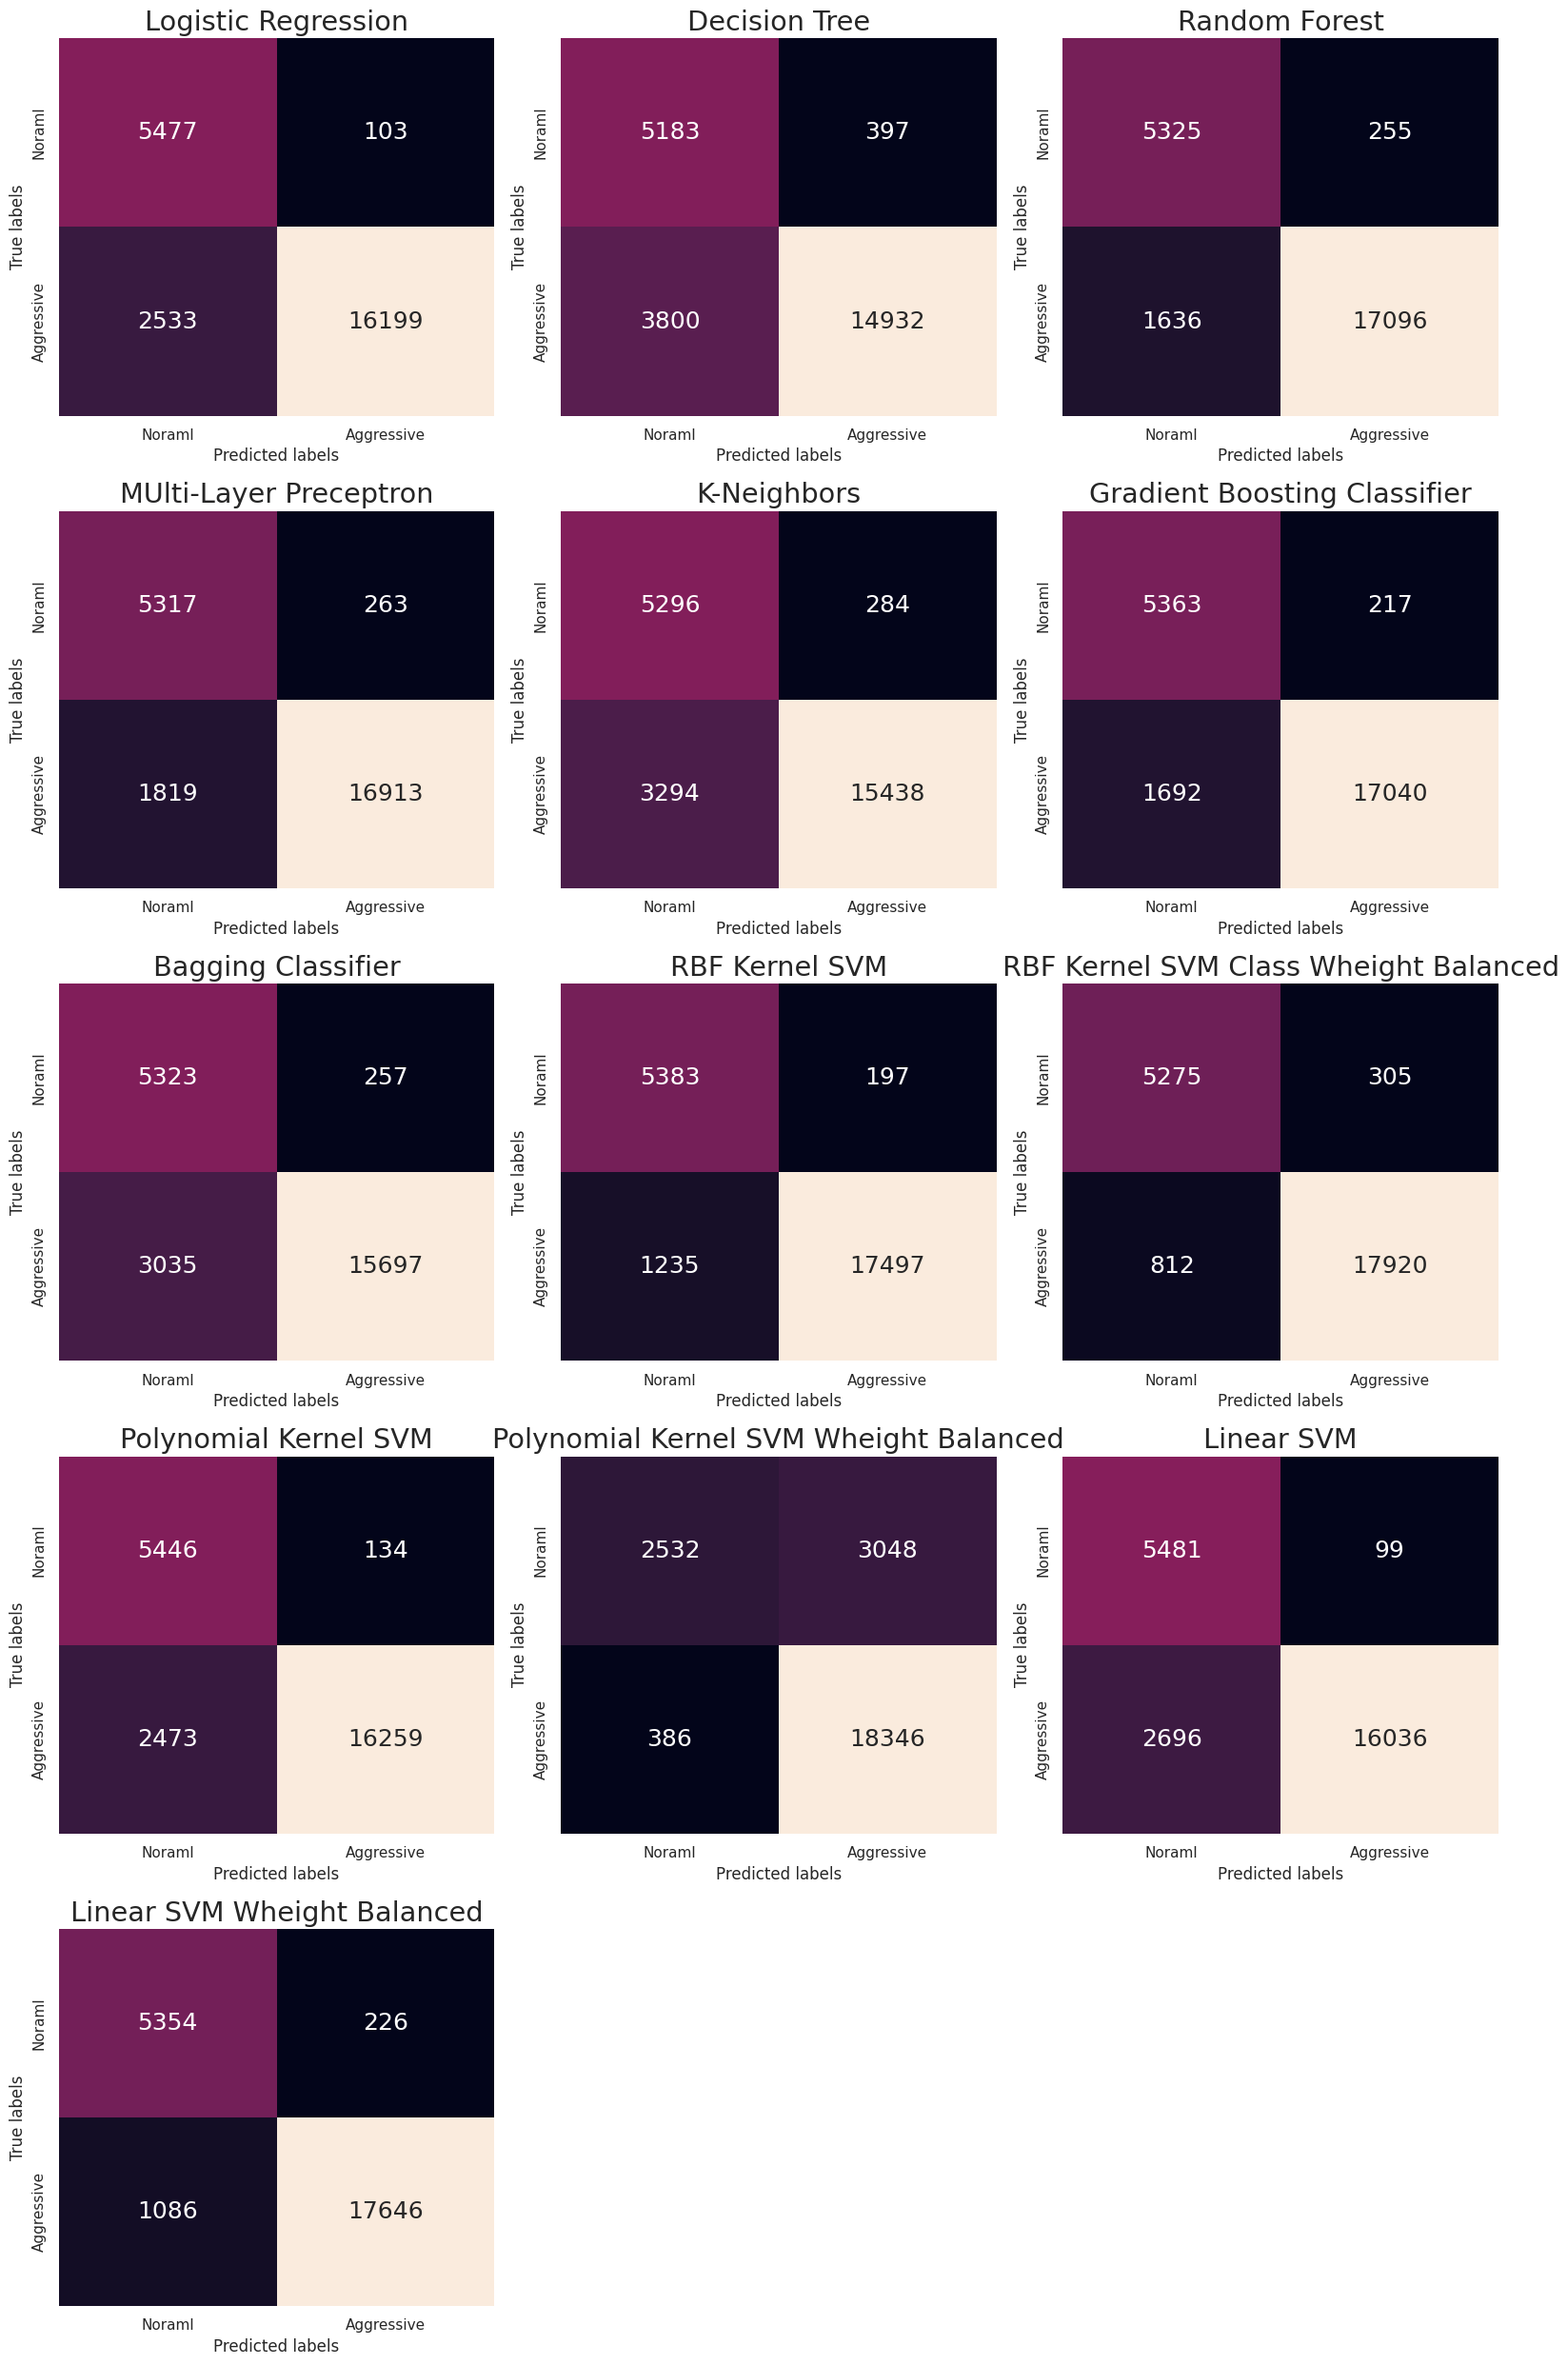

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrices(models_dict, X_test, y_test):
    # Number of models
    num_models = len(models_dict)
    num_rows = (num_models + 2) // 3  # ensure 3 columns, rounding up rows

    # Create a large figure to hold all subplots
    fig, axes = plt.subplots(num_rows, 3, figsize=(16, num_rows * 5))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, (model_name, model) in enumerate(models_dict.items()):
        try:
          # Predict the outcomes
          y_pred = model.predict(X_test)
          # Calculate the confusion matrix
          cm = confusion_matrix(y_test, y_pred)
          # Plotting the confusion matrix
          sns.heatmap(cm, annot=True, annot_kws={"size": 18}, fmt="d", ax=axes[i],cbar=False)
          axes[i].set_title(model_name,fontsize='xx-large')
          axes[i].set_xlabel('Predicted labels')
          axes[i].set_ylabel('True labels')
          axes[i].xaxis.set_ticklabels(['Noraml', 'Aggressive'],)#rotation=45)
          axes[i].yaxis.set_ticklabels(['Noraml', 'Aggressive'],)#rotation=45)
        except Exception as e:
          print(f"Error in {model_name}: {e}")

    # Adjust the layout and remove any empty subplots
    for j in range(i + 1, num_rows * 3):
        fig.delaxes(axes[j])
    plt.tight_layout()
    plt.show()

plot_confusion_matrices(models, X_test, y_test)


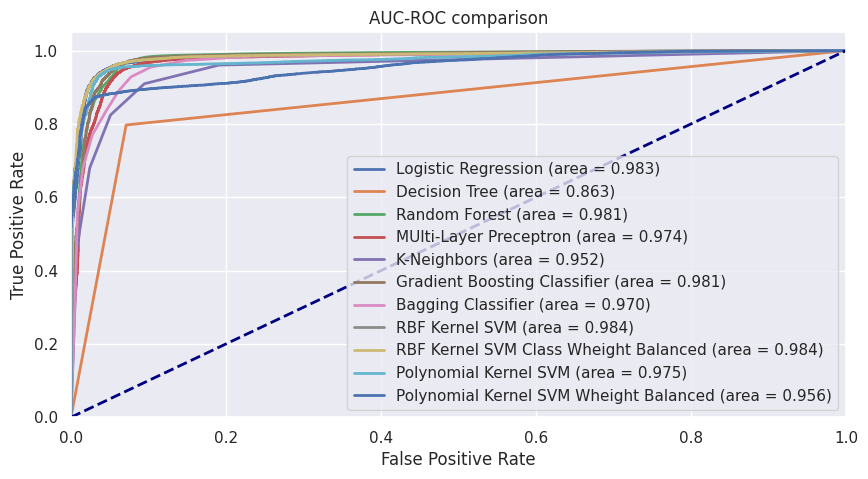

In [ ]:
sns.set_theme(style="darkgrid", rc={ 'figure.figsize': (10, 5)})
# Plot summary of ROC Curves
# plt.figure(figsize=(6, 5))
for fpr, tpr, roc_auc, name in roc_data:
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC comparison')
plt.legend(loc="lower right")
plt.show()